In [1]:
import bs4 as bs
import pickle
import requests
#Pickle seralises every python object
#he requests module allows you to send HTTP requests using Python.

#The HTTP request returns a Response Object with all the response data (content, encoding, status, etc).

In [2]:
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web

In [3]:
!pip install pandas_datareader

In [4]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,"lxml")
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.replace('\n','')
        if "." in ticker:
            ticker = ticker.replace('.','-')
            print('ticker replaced to', ticker) 
        tickers.append(ticker)
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers,f)
    print(tickers)
    return tickers
save_sp500_tickers()

ticker replaced to BRK-B
ticker replaced to BF-B
['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK-B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO

In [5]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2016,1,1)
    end = dt.datetime(2019,12,31)
    
    for ticker in tickers[:25]:
        print(ticker)
        if not  os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker,'yahoo',start,end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            
        else:
            print('Already have {}'.format(ticker))
get_data_from_yahoo()

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO


In [7]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers[:25]):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20
                   MMM        ABT       ABBV       ABMD        ACN       ATVI  \
Date                                                                            
2015-12-31  131.364426  40.715683  46.809273  90.279999  95.858231  37.419464   
2016-01-04  128.033249  38.920612  45.521305  85.239998  93.409027  36.365803   
2016-01-05  128.591339  38.911533  45.331665  85.000000  93.895187  35.901806   
2016-01-06  126.001358  38.585155  45.339561  85.300003  93.711723  35.563477   
2016-01-07  122.931786  37.660427  45.205238  81.919998  90.959824  35.060810   

                 ADBE   AMD         AAP       AES  ...        ALB        ARE  \
Date                                               ...                         
2015-12-31  93.940002  2.87  148.303223  7.825994  ...  51.937859  78.638962   
2016-01-04  91.970001  2.77  150.007889  7.711508  ...  51.511295  77.551102   
2016-01-05  92.339996  2.75  148.983154  7.817816  ...  50.723099  78.621544   
2016-01-06  91.019997  2

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from collections import Counter

style.use('ggplot')

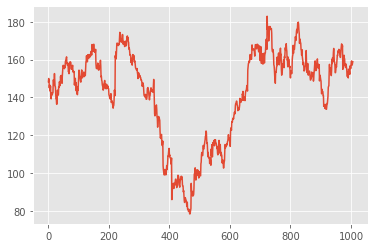

In [9]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df['AAP'].plot()
    plt.show()
    
visualize_data()    

In [10]:
# Finding corelation between other companies
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    
visualize_data()        

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.288588  0.785708  0.560471  0.346082  0.749582  0.379340   
ABT   0.288588  1.000000  0.615409  0.635763  0.967658  0.359201  0.970913   
ABBV  0.785708  0.615409  1.000000  0.767569  0.679359  0.809042  0.710710   
ABMD  0.560471  0.635763  0.767569  1.000000  0.629538  0.668801  0.757123   
ACN   0.346082  0.967658  0.679359  0.629538  1.000000  0.467332  0.971145   

           AMD       AAP       AES  ...       ALB       ARE      ALXN  \
MMM   0.175061 -0.503972  0.086703  ...  0.789713  0.357965 -0.272956   
ABT   0.922545  0.178407  0.910599  ... -0.132138  0.919516 -0.444713   
ABBV  0.469964 -0.318010  0.392917  ...  0.431636  0.605933 -0.400380   
ABMD  0.493431  0.051985  0.511451  ...  0.177893  0.508515 -0.272154   
ACN   0.912733  0.102549  0.855851  ... -0.047648  0.941178 -0.496808   

          ALGN      ALLE       LNT       ALL     GOOGL      GOOG        MO  
MMM   0.631745 

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.288588  0.785708  0.560471  0.346082  0.749582  0.379340   
ABT   0.288588  1.000000  0.615409  0.635763  0.967658  0.359201  0.970913   
ABBV  0.785708  0.615409  1.000000  0.767569  0.679359  0.809042  0.710710   
ABMD  0.560471  0.635763  0.767569  1.000000  0.629538  0.668801  0.757123   
ACN   0.346082  0.967658  0.679359  0.629538  1.000000  0.467332  0.971145   

           AMD       AAP       AES  ...       ALB       ARE      ALXN  \
MMM   0.175061 -0.503972  0.086703  ...  0.789713  0.357965 -0.272956   
ABT   0.922545  0.178407  0.910599  ... -0.132138  0.919516 -0.444713   
ABBV  0.469964 -0.318010  0.392917  ...  0.431636  0.605933 -0.400380   
ABMD  0.493431  0.051985  0.511451  ...  0.177893  0.508515 -0.272154   
ACN   0.912733  0.102549  0.855851  ... -0.047648  0.941178 -0.496808   

          ALGN      ALLE       LNT       ALL     GOOGL      GOOG        MO  
MMM   0.631745 

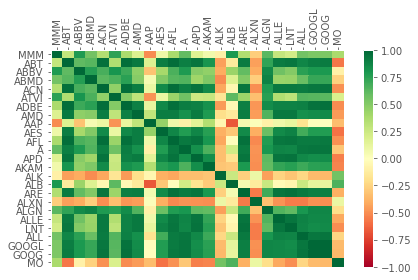

In [11]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')

    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()

visualize_data()

In [12]:
# video 9 - BUY , SELL HOLD ( NEW value - old / old value) and New Value is 7 days after - 7 day % change in the future
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]

    df.fillna(0, inplace=True)
    return tickers, df

#Video 10 - but 1, sell (-1) and hold (0)
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [15]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)] ))
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals))
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values

    return X,y,df


extract_featuresets('AAP')


Data spread: Counter({'1': 443, '-1': 439, '0': 125})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.02535829, -0.04408794, -0.02751523, ..., -0.0238686 ,
         -0.02245411, -0.01408696],
        [ 0.00435895, -0.00023327, -0.00416596, ...,  0.00275206,
          0.00099751,  0.02021257],
        ...,
        [ 0.00379418,  0.00137502, -0.00701326, ..., -0.00574688,
         -0.00625552,  0.        ],
        [-0.00806726, -0.00686511, -0.00762326, ..., -0.01102142,
         -0.01165036, -0.01011899],
        [ 0.00335546,  0.00069122,  0.00022594, ..., -0.00023882,
          0.00065862,  0.00040089]]),
 array([-1, -1, -1, ...,  0,  0,  0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2015-12-31  131.364426  40.715683  46.809273   90.279999   95.858231   
 2016-01-04  128.033249  38.920612  45.521305   85.239998   93.409027   
 2016-01-05  128.591339  38.9

In [17]:
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [21]:
# Video 12 - Apply ML - X = %change in prices for all companies  y= [0,1,-1]
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    print()
    print()
    
do_ml('GOOGL')
do_ml('AAP')
do_ml('MMM')    

Data spread: Counter({'1': 452, '-1': 298, '0': 257})
accuracy: 0.3373015873015873
predicted class counts: Counter({-1: 88, 0: 87, 1: 77})


Data spread: Counter({'1': 443, '-1': 439, '0': 125})
accuracy: 0.3611111111111111
predicted class counts: Counter({-1: 156, 1: 66, 0: 30})


Data spread: Counter({'1': 368, '0': 365, '-1': 274})
accuracy: 0.3412698412698413
predicted class counts: Counter({0: 142, -1: 73, 1: 37})




In [22]:
# Applying Voting Classifier
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    clf = VotingClassifier([('lsvc',svm.LinearSVC()),
                            ('knn',neighbors.KNeighborsClassifier()),
                            ('rfor',RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    print()
    print()
    
do_ml('GOOGL')
do_ml('AAP')
do_ml('MMM')    

Data spread: Counter({'1': 452, '-1': 298, '0': 257})
accuracy: 0.42063492063492064
predicted class counts: Counter({1: 182, -1: 50, 0: 20})


Data spread: Counter({'1': 443, '-1': 439, '0': 125})
accuracy: 0.36507936507936506
predicted class counts: Counter({-1: 151, 1: 101})


Data spread: Counter({'1': 368, '0': 365, '-1': 274})
accuracy: 0.3611111111111111
predicted class counts: Counter({0: 123, 1: 86, -1: 43})


